Code to compare D Stat of Two Graphs

In [3]:
import networkx as nx
from scipy.stats import ks_2samp

def read_network(file_path):
    # Read the network graph from the .txt file
    G = nx.read_edgelist(file_path)
    return G

def calculate_ks_statistic(graph1, graph2):
    degrees1 = list(dict(graph1.degree()).values())
    degrees2 = list(dict(graph2.degree()).values())

    ks_statistic, ks_p_value = ks_2samp(degrees1, degrees2)

    return ks_statistic, ks_p_value

if __name__ == "__main__":
    # Specify the paths to the input .txt files for the networks
    file_path1 = "/home/noshamedevil//Documents/Assignments/SNACKS/SNACKS-Final-Project/Original_Data/soc-google-plus.txt"
    file_path2 = "/home/noshamedevil//Documents/Assignments/SNACKS/SNACKS-Final-Project/Sampled_Graphs/sampled_forest_fire_network.txt"

    # Read the networks
    network1 = read_network(file_path1)
    network2 = read_network(file_path2)

    # Calculate KS statistic
    ks_statistic, ks_p_value = calculate_ks_statistic(network1, network2)

    # Print the KS statistic and p-value
    print(f"KS Statistic: {ks_statistic}")
    


KS Statistic: 0.18606409477906818


To verify the property of the graph in various conditions

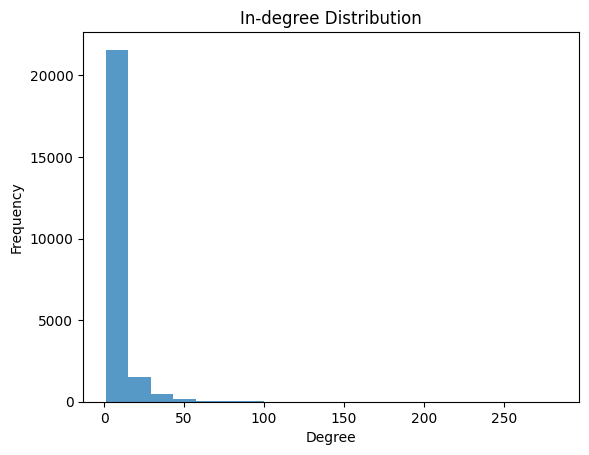

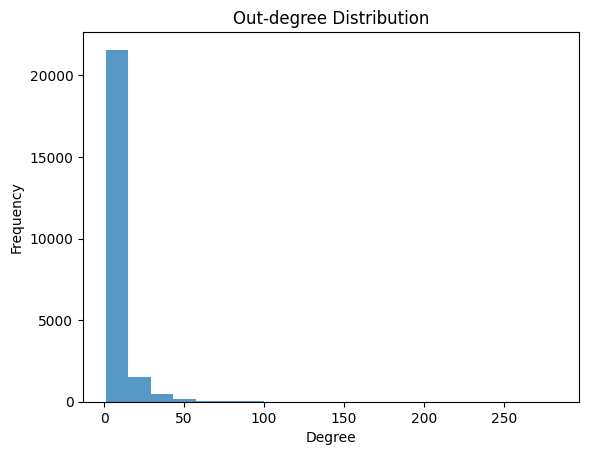

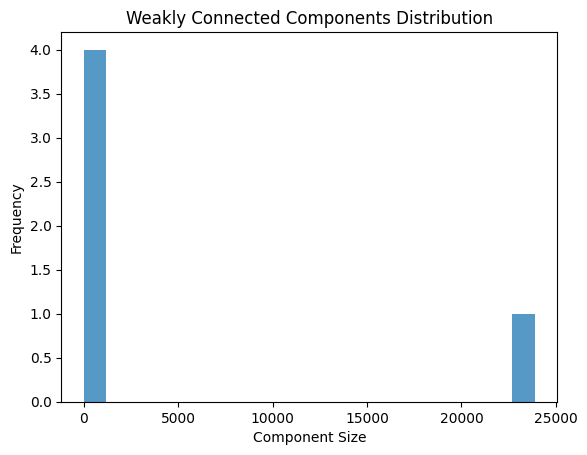

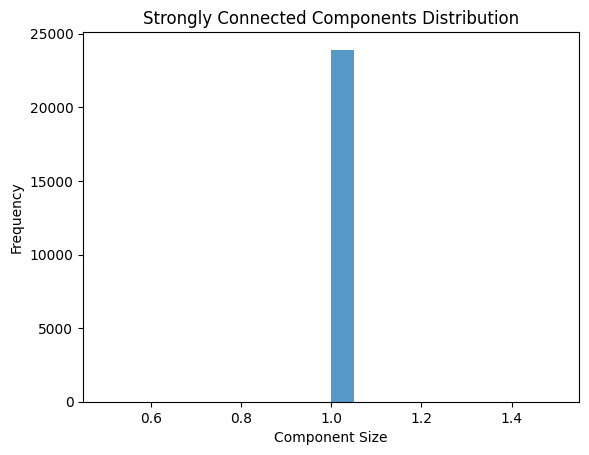

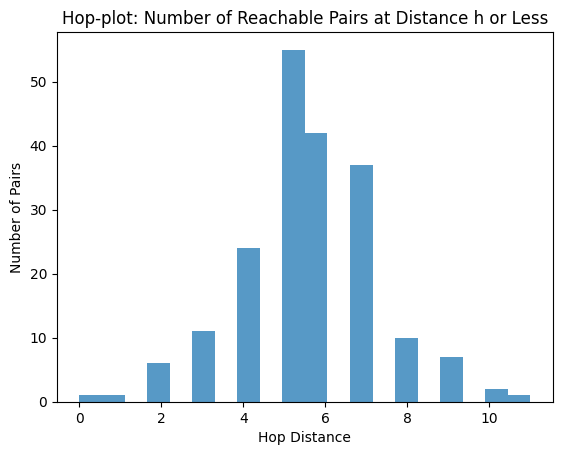

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the graph from a .txt file
def load_graph_from_txt(file_path):
    G = nx.read_edgelist(file_path, create_using=nx.DiGraph())
    return G

# Plot degree distribution
def plot_degree_distribution(graph, title):
    degrees = [graph.degree(node) for node in graph.nodes()]
    plt.hist(degrees, bins=20, alpha=0.75)
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

# Plot connected components distribution
def plot_connected_components_distribution(graph, title, weak=True):
    if weak:
        components = list(nx.weakly_connected_components(graph))
    else:
        components = list(nx.strongly_connected_components(graph))

    component_sizes = [len(component) for component in components]
    plt.hist(component_sizes, bins=20, alpha=0.75)
    plt.title(title)
    plt.xlabel('Component Size')
    plt.ylabel('Frequency')
    plt.show()

# Plot hop-plot
def plot_hop_plot(graph, title):
    hop_plot = nx.single_source_shortest_path_length(graph, list(graph.nodes())[0])
    hop_values = list(hop_plot.values())
    plt.hist(hop_values, bins=20, alpha=0.75)
    plt.title(title)
    plt.xlabel('Hop Distance')
    plt.ylabel('Number of Pairs')
    plt.show()

# Load the graph from the .txt file
graph_file_path = '/home/noshamedevil/Documents/Assignments/SNACKS/SNACKS-Final-Project/Sampled_Graphs/sampled_forest_fire_network.txt'
graph = load_graph_from_txt(graph_file_path)

# Plot degree distribution
plot_degree_distribution(graph, 'In-degree Distribution')
plot_degree_distribution(graph.reverse(), 'Out-degree Distribution')

# Plot connected components distribution
plot_connected_components_distribution(graph, 'Weakly Connected Components Distribution', weak=True)
plot_connected_components_distribution(graph, 'Strongly Connected Components Distribution', weak=False)

# Plot hop-plot
plot_hop_plot(graph, 'Hop-plot: Number of Reachable Pairs at Distance h or Less')
